In [ ]:
! pip install PyMySQL

In [ ]:
import pymysql.cursors
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )
cursor = connection.cursor()
cursor

In [ ]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 그래프 스타일 설정
plt.style.use("seaborn")

In [ ]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 삼성전자의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '005930'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-08-01'
"""  

In [ ]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('38750.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('39400.000'),
  'L_PRC': Decimal('38550.000'),
  'O_PRC': Decimal('39400.000'),
  'STK_CD': '005930',
  'VOL': Decimal('7847664.000')},
 {'C_PRC': Decimal('37600.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('38550.000'),
  'L_PRC': Decimal('37450.000'),
  'O_PRC': Decimal('38300.000'),
  'STK_CD': '005930',
  'VOL': Decimal('12471493.000')},
 {'C_PRC': Decimal('37450.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('37600.000'),
  'L_PRC': Decimal('36850.000'),
  'O_PRC': Decimal('37450.000'),
  'STK_CD': '005930',
  'VOL': Decimal('14108958.000')},
 {'C_PRC': Decimal('38750.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('38900.000'),
  'L_PRC': Decimal('37800.000'),
  'O_PRC': Decimal('38000.000'),
  'STK_CD': '005930',
  'VOL': Decimal('12748997.000')},
 {'C_PRC': Decimal('38100.000'),
  'DT': datetime.date(2019, 1, 8),
  'H_PRC': Decimal('39200.000'),
  'L

In [ ]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,005930,2019-01-02,38750.000,39400.000,39400.000,38550.000,7847664.000
1,005930,2019-01-03,37600.000,38300.000,38550.000,37450.000,12471493.000
2,005930,2019-01-04,37450.000,37450.000,37600.000,36850.000,14108958.000
3,005930,2019-01-07,38750.000,38000.000,38900.000,37800.000,12748997.000
4,005930,2019-01-08,38100.000,38000.000,39200.000,37950.000,12756554.000
...,...,...,...,...,...,...,...
140,005930,2019-07-26,47150.000,46650.000,47150.000,46550.000,7873886.000
141,005930,2019-07-29,46100.000,46800.000,47050.000,46000.000,6856846.000
142,005930,2019-07-30,46550.000,46300.000,46850.000,46300.000,5551014.000
143,005930,2019-07-31,45350.000,46200.000,46600.000,45000.000,12872916.000


In [ ]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  145 non-null    object        
 1   DT      145 non-null    datetime64[ns]
 2   C_PRC   145 non-null    int64         
 3   O_PRC   145 non-null    int64         
 4   H_PRC   145 non-null    int64         
 5   L_PRC   145 non-null    int64         
 6   VOL     145 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 8.1+ KB


# **지수이동평균 구하기**
단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점이 있기 때문에 이를 해결하기 위해서 MACD에서는 지수이동평균을 사용합니다.
단순이동 평균과 지수 이동 평균 : https://www.cmegroup.com/ko/education/learn-about-trading/courses/technical-analysis/understanding-moving-averages.html#

In [ ]:
# 12일 지수이동평균을 구합니다.
short = 12
df["ema_short"] = df["C_PRC"].ewm(short).mean()
# 26일 지수이동평균을 구합니다.
long = 26
df["ema_long"] = df["C_PRC"].ewm(long).mean()
# 거래일 DT를 인덱스로 설정 합니다
df = df.set_index("DT")
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long
DT,,,,,,,,
2019-01-02,005930,38750,39400,39400,38550,7847664,38750.000000,38750.000000
2019-01-03,005930,37600,38300,38550,37450,12471493,38152.000000,38164.150943
2019-01-04,005930,37450,37450,37600,36850,14108958,37899.040512,37917.062174
2019-01-07,005930,38750,38000,38900,37800,12748997,38137.961661,38137.228899
2019-01-08,005930,38100,38000,39200,37950,12756554,38129.108043,38129.210778
...,...,...,...,...,...,...,...,...
2019-07-26,005930,47150,46650,47150,46550,7873886,46140.386918,45508.404494
2019-07-29,005930,46100,46800,47050,46000,6856846,46137.280196,45530.419017
2019-07-30,005930,46550,46300,46850,46300,5551014,46169.028213,45568.353146


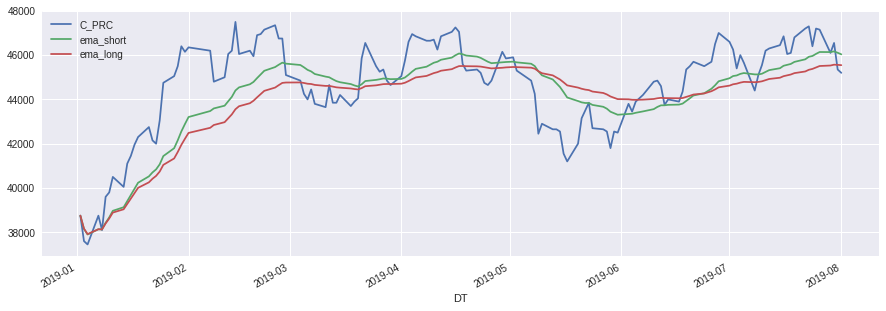

In [ ]:
# "C_PRC", "ema_short" (12일 지수 이동평균), "ema_long"(26일 지수 이동 평균) 을 시각화 합니다.
df[["C_PRC", "ema_short", "ema_long"]].plot(figsize=(15, 5))

## MACD값 구하기

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

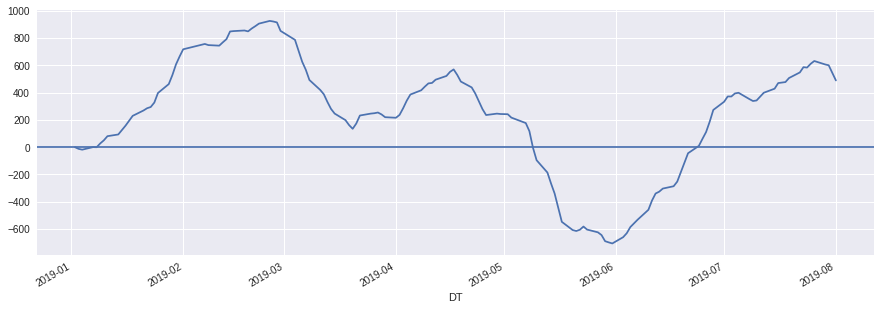

In [ ]:
# MACD = 단기 지수이동평균(12일 지수 이동 평균) - 장기 지수이동평균 (26일 지수 이동 평균)
df["MACD"] = df["ema_short"] - df["ema_long"]
# MACD 값 시각화
df["MACD"].plot(figsize=(15, 5))
# 0 지점에 선을 그림
plt.axhline(0)

## MACD 시각화 

* MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
* 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
* (주의 : 매수 신호와 매도 신호는 지표에서 데이터를 보는 기준이기 때문에 실제 거래와는 맞지 않을 수 있습니다.)

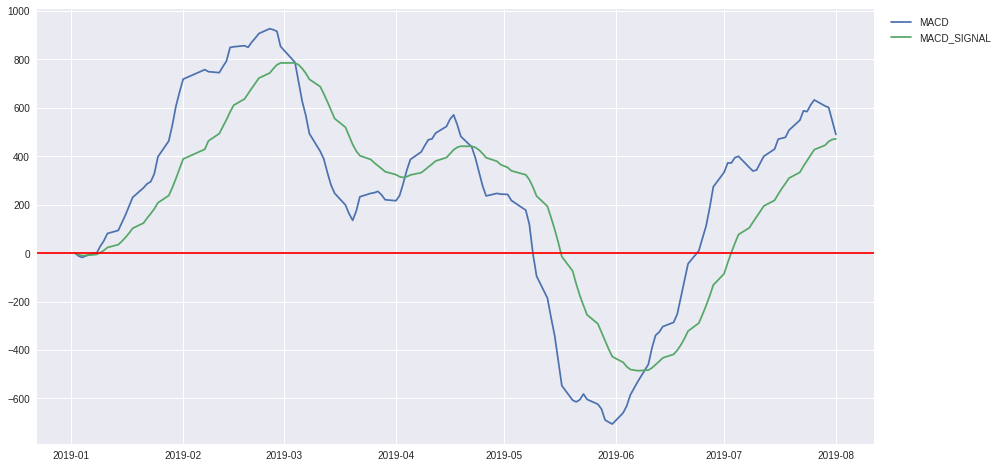

In [ ]:
# MACD = 단기 지수이동평균(12일 지수 이동 평균) - 장기 지수이동평균 (26일 지수 이동 평균)
df["MACD"] = df["ema_short"] - df["ema_long"]
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df["MACD"].ewm(9).mean()
# MACD 와 9일 이동 평균 signal 시각화
# MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
# 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
# df[["MACD", "signal"]].plot(figsize=(15, 5))
plt.figure(figsize=(15,8))
plt.plot(df['MACD'], label = 'MACD')
plt.plot(df['signal'], label = 'MACD_SIGNAL')

plt.legend(bbox_to_anchor=(1.15, 1), fontsize = 10)

# 0에 선을 그림
plt.axhline(0, color = 'red')

## MACD oscillator 값 구하기
* 볼린저 밴드의 %B 값
* RSI의 signal 값
* macdhist 값은 오실레이터(oscillator) 와 유사합니다.
* 기준선을 중심으로 아래위로 움직이는 성질을 갖는 지표를 오실레이터라 한다. 대개 추세 변화를 빨리 감지하려는 목적이며, 그래프의 기울기(변화량)를 측정하는 것과 비슷하다. 출처 : [스토캐스틱 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1)

* https://www.nanumtrading.com/fx-%EB%B0%B0%EC%9A%B0%EA%B8%B0/%EC%B0%A8%ED%8A%B8-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4/04-%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1/

<BarContainer object of 145 artists>

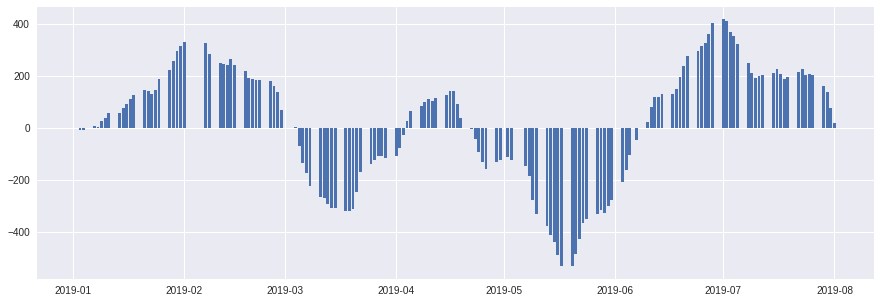

In [ ]:
# MACD oscillator 계산
df["macdhist"] = df["MACD"] - df["signal"]
plt.figure(figsize=(15,5))
# MACD oscillator  시각화
plt.bar(df.index, df.macdhist)

In [ ]:
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long,MACD,signal,macdhist
DT,,,,,,,,,,,
2019-01-02,005930,38750,39400,39400,38550,7847664,38750.000000,38750.000000,0.000000,0.000000,0.000000
2019-01-03,005930,37600,38300,38550,37450,12471493,38152.000000,38164.150943,-12.150943,-6.395233,-5.755710
2019-01-04,005930,37450,37450,37600,36850,14108958,37899.040512,37917.062174,-18.021662,-10.685428,-7.336234
2019-01-07,005930,38750,38000,38900,37800,12748997,38137.961661,38137.228899,0.732762,-7.365222,8.097984
2019-01-08,005930,38100,38000,39200,37950,12756554,38129.108043,38129.210778,-0.102735,-5.591764,5.489029
...,...,...,...,...,...,...,...,...,...,...,...
2019-07-26,005930,47150,46650,47150,46550,7873886,46140.386918,45508.404494,631.982424,426.805014,205.177409
2019-07-29,005930,46100,46800,47050,46000,6856846,46137.280196,45530.419017,606.861178,444.810636,162.050542
2019-07-30,005930,46550,46300,46850,46300,5551014,46169.028213,45568.353146,600.675066,460.397084,140.277982


plotly를 통한 시각화

In [ ]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

     |████████████████████████████████| 21.8 MB 1.5 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
# plotly.express 로드하기
import plotly.express as px
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2019-01-02 to 2019-08-01
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STK_CD     145 non-null    object 
 1   C_PRC      145 non-null    int64  
 2   O_PRC      145 non-null    int64  
 3   H_PRC      145 non-null    int64  
 4   L_PRC      145 non-null    int64  
 5   VOL        145 non-null    int64  
 6   ema_short  145 non-null    float64
 7   ema_long   145 non-null    float64
 8   MACD       145 non-null    float64
 9   signal     145 non-null    float64
 10  macdhist   145 non-null    float64
dtypes: float64(5), int64(5), object(1)
memory usage: 13.6+ KB


In [ ]:
# 주식의 시가, 고개, 저가, 종가 시각화
px.line(df[["O_PRC","H_PRC","L_PRC","C_PRC"]], title="OHLC")

In [ ]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title="MACD", height=500)

In [ ]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df["macdhist"], height=300)

### graph_objects 와 subplots 을 사용한 시각화
* [Subplots | Python | Plotly](https://plotly.com/python/subplots/)

In [ ]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots
# 시가 종가 저가 고가를 나타내는 봉차트
candlestick = go.Candlestick(x=df.index, 
                             open=df.O_PRC, 
                             high=df.H_PRC, 
                             low=df.L_PRC, 
                             close=df.C_PRC)

# MACD 선차트
macd = go.Scatter(x=df.index, y=df["MACD"], name="MACD")

# signal 선차트
signal = go.Scatter(x=df.index, y=df["signal"], name="signal")

# macdhist 막대 차트
oscillator = go.Bar(x=df.index, y=df["macdhist"], name="oscillator")

# 거래량 막대 차트
trade_volume = go.Bar(x=df.index, y=df["VOL"], name="거래량")

# make_subplots을 통해 4개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.

# 4줄 1칸의 그래프 생성
fig = subplots.make_subplots(rows=4, cols=1)

#1번째줄 1번째 칸에 봉차트
fig.append_trace(candlestick, 1, 1)

# 3번째줄 1번째 칸에 macd 차트
fig.append_trace(macd, 3, 1)

# 3번째줄 1번째 칸에 signal 차트
fig.append_trace(signal, 3, 1)

# 3번째줄 1번째 칸에 oscillator 차트
fig.append_trace(oscillator, 3, 1)


# 4번째줄 1번째 칸에 거래량 차트
fig.append_trace(trade_volume, 4, 1)
fig.show()